# Working on the training data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

df=pd.read_csv('instagram_user.csv')
df=df.iloc[:,:12]
df.sample(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
147,1,0.36,5,0.0,0,71,0,0,8,216,305,0
192,1,0.00,2,0.0,0,13,0,1,8,751,1223,0
522,0,0.13,2,0.0,0,0,0,0,0,42,240,1
409,0,0.38,1,0.0,0,0,0,0,1,120,181,1
338,1,0.30,0,0.0,0,0,0,1,17,316,1165,1


In [3]:
# check for the missing values
df.shape

(576, 12)

In [5]:
df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [9]:
# number of unique values in dataframe
df.nunique()

profile pic               2
nums/length username     54
fullname words            9
nums/length fullname     25
name==username            2
description length      104
external URL              2
private                   2
#posts                  193
#followers              372
#follows                400
fake                      2
dtype: int64

*  CORRELATION MATRIX BETWEEN EACH FEATURE

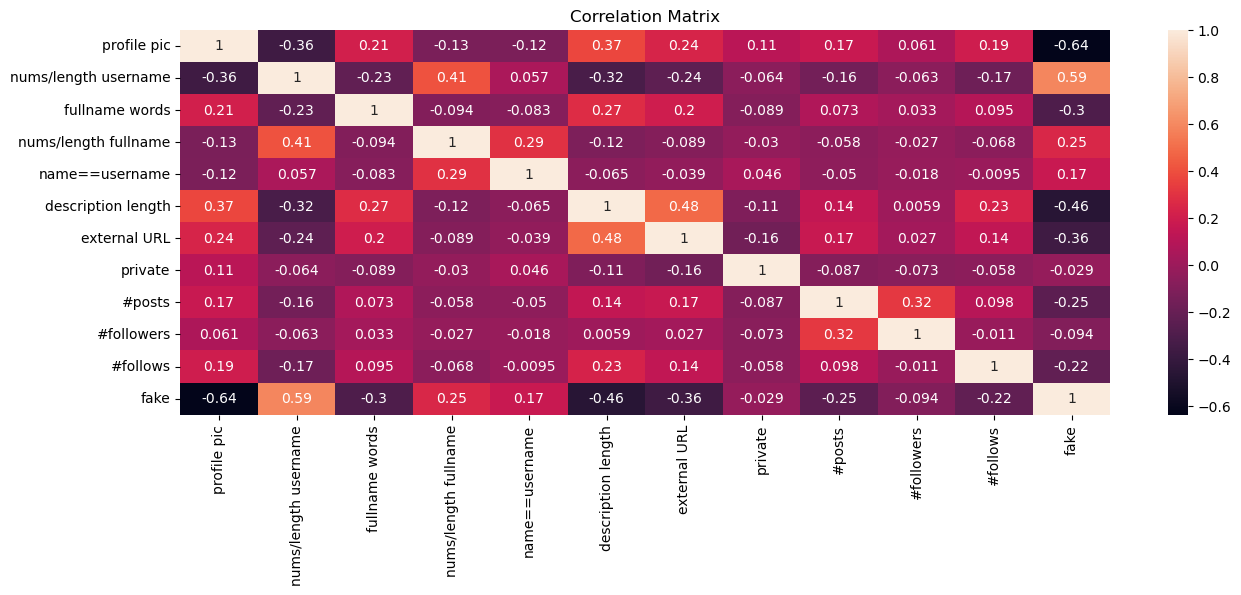

In [12]:
correlation=df.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(correlation,annot=True)
plt.title('Correlation Matrix')
plt.show()

# EDA

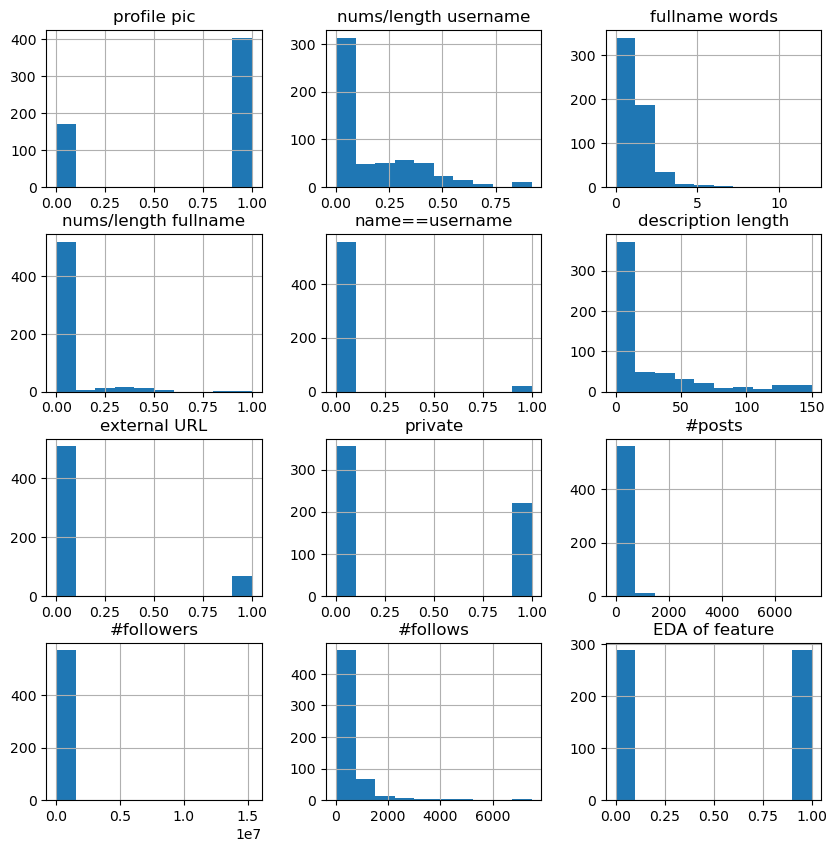

In [15]:
df.hist(figsize=(10,10))
plt.title('EDA of feature')
plt.show()

* Profile picture (Fake vs genuine)

profile pic
1    404
0    172
Name: count, dtype: int64


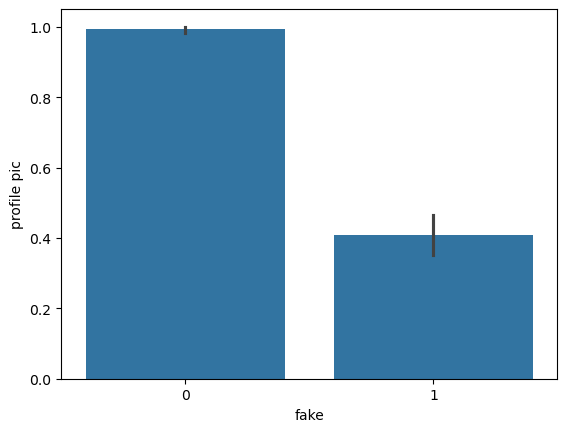

In [17]:
print(df['profile pic'].value_counts())
sns.barplot(x='fake', y='profile pic', data=df)
plt.show()

<Axes: xlabel='nums/length username', ylabel='fake'>

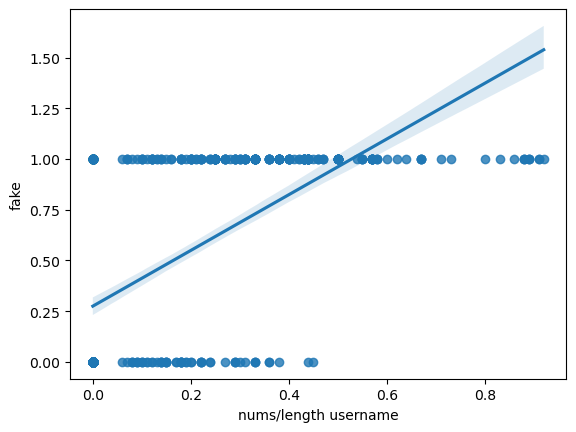

In [19]:
sns.regplot(data=df,x='nums/length username',y='fake')

* Followers VS fake

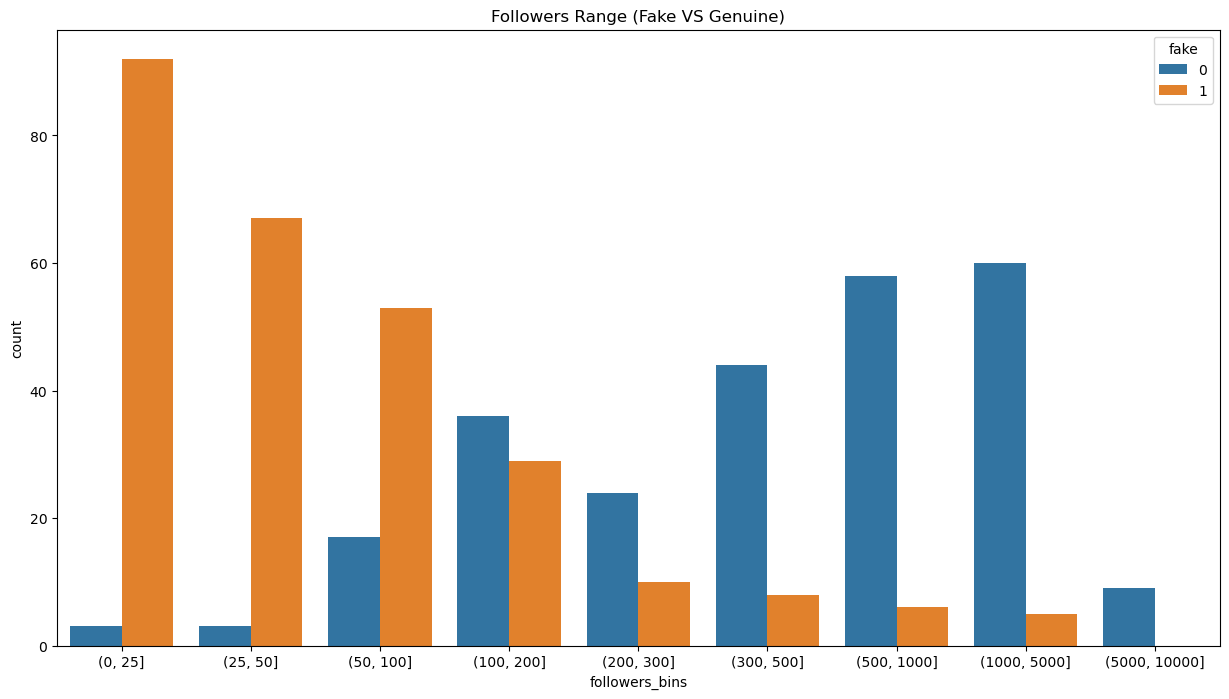

In [23]:
# Followers column
bins=[0,25,50,100,200,300,500,1000,5000,10000]
df['followers_bins']=pd.cut(df['#followers'],bins=bins)
plt.subplots(figsize=(15,8))
plt.title('Followers Range (Fake VS Genuine)')
sns.countplot(data=df,x='followers_bins',hue='fake')
plt.show()

* Follows which are fake

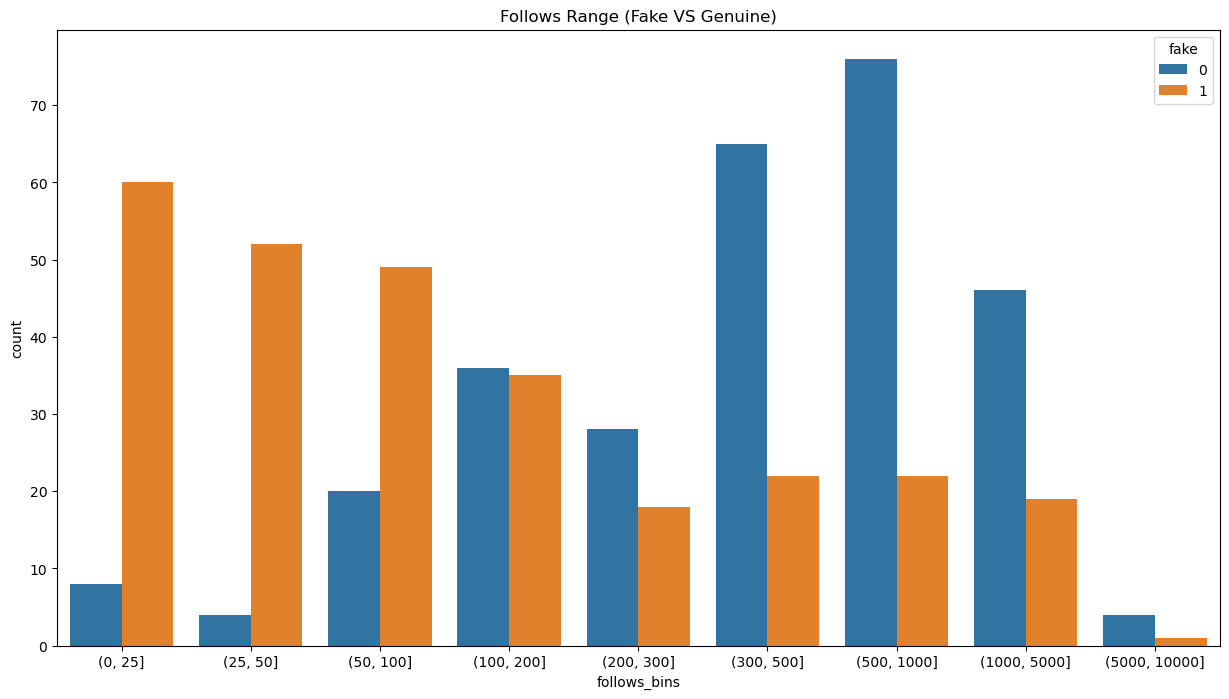

In [26]:
# Follows column which are fake
bins=[0,25,50,100,200,300,500,1000,5000,10000]
df['follows_bins']=pd.cut(df['#follows'],bins=bins)
plt.subplots(figsize=(15,8))
plt.title('Follows Range (Fake VS Genuine)')
sns.countplot(data=df,x='follows_bins',hue='fake')
plt.show()

In [28]:
# Now removing the follows_bin and followers_bin for further process
df=df.drop(columns=['follows_bins','followers_bins'])
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


* Private account (Fake vs Genuine)

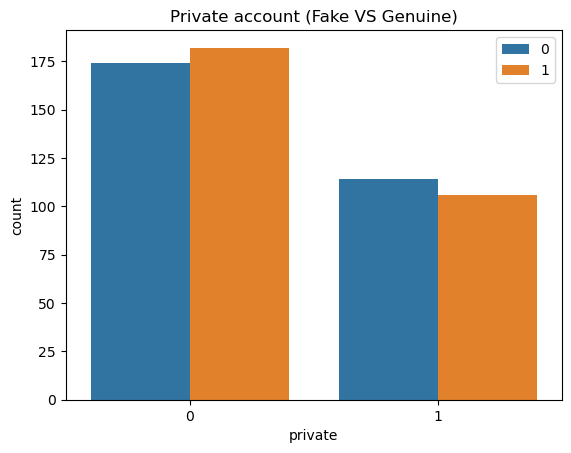

In [31]:
sns.countplot(data=df,x='private',hue='fake')
plt.title('Private account (Fake VS Genuine)')
plt.legend()
plt.show()

* outlier detection

profile pic                Axes(0.125,0.712609;0.168478x0.167391)
nums/length username    Axes(0.327174,0.712609;0.168478x0.167391)
fullname words          Axes(0.529348,0.712609;0.168478x0.167391)
nums/length fullname    Axes(0.731522,0.712609;0.168478x0.167391)
name==username             Axes(0.125,0.511739;0.168478x0.167391)
description length      Axes(0.327174,0.511739;0.168478x0.167391)
external URL            Axes(0.529348,0.511739;0.168478x0.167391)
private                 Axes(0.731522,0.511739;0.168478x0.167391)
#posts                      Axes(0.125,0.31087;0.168478x0.167391)
#followers               Axes(0.327174,0.31087;0.168478x0.167391)
#follows                 Axes(0.529348,0.31087;0.168478x0.167391)
fake                     Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

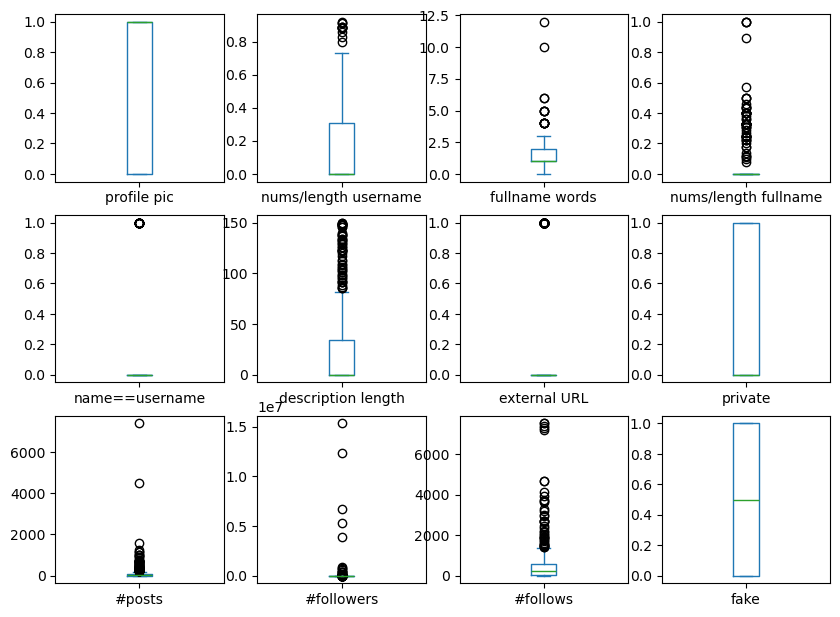

In [34]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))

# calculating accuracy score

Accuracy before GridSearchCV: 93.0635838150289
Accuracy after GridSearchCV: 93.0635838150289
Accuracy after Bagging technique: 93.0635838150289
Accuracy with DecisionTree (25-fold CV): 88.35507246376812


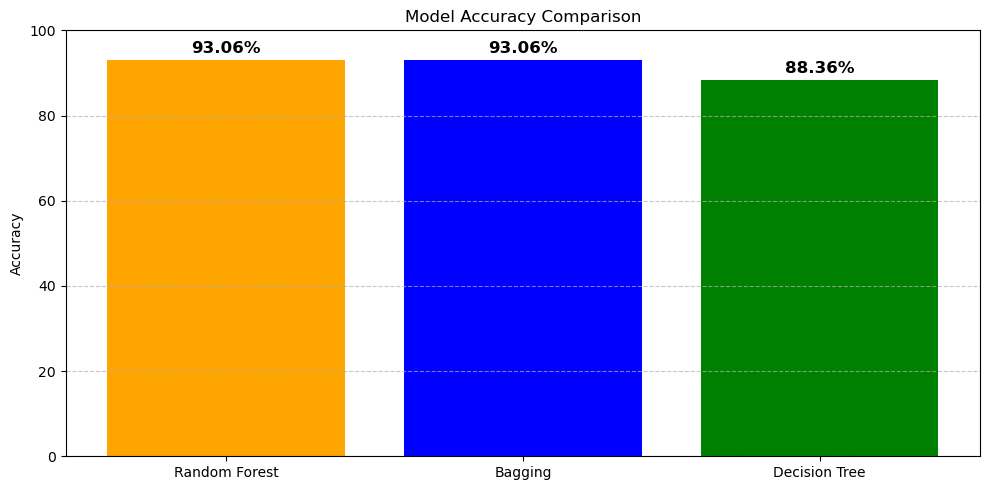

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Splitting features and target
x = df.drop(columns=['fake'])
y = df['fake']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scaling the training and testing data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initial Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred) * 100
print('Accuracy before GridSearchCV:', accuracy_rf)

# GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)
best_accuracy = accuracy_score(y_test, y_pred_best) * 100
print("Accuracy after GridSearchCV:", best_accuracy)

# Bagging with Decision Tree
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bag.fit(x_train, y_train)
y_pred_bag = bag.predict(x_test)
accuracy_bag = accuracy_score(y_test, y_pred_bag) * 100
print('Accuracy after Bagging technique:', accuracy_bag)

# Cross-validation with DecisionTree
clf_dt = DecisionTreeClassifier(random_state=42)
scores = np.mean(cross_val_score(clf_dt, x, y, cv=25, scoring='accuracy')) * 100
print("Accuracy with DecisionTree (25-fold CV):", scores)

# Plotting with values on bars
models = ['Random Forest', 'Bagging', 'Decision Tree']
accuracies = [accuracy_rf, accuracy_bag, scores]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracies, color=['orange', 'blue', 'green'])

# Annotate accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f'{acc:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# visualize confusion matrix

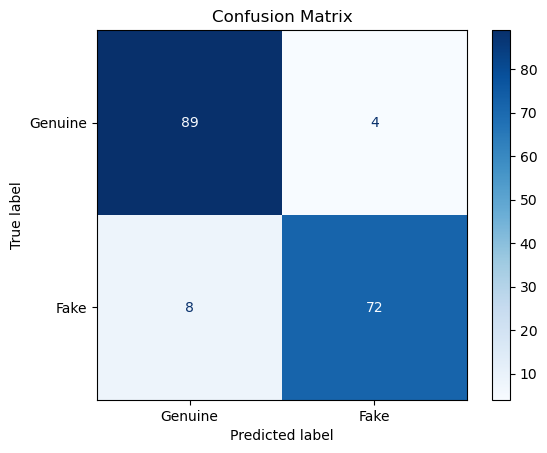

Confusion Matrix:
 [[89  8]
 [ 4 72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        97
           1       0.90      0.95      0.92        76

    accuracy                           0.93       173
   macro avg       0.93      0.93      0.93       173
weighted avg       0.93      0.93      0.93       173



In [39]:
from sklearn.metrics import confusion_matrix,classification_report
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
display_labels=['Genuine', 'Fake'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print('Confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('Classification Report:\n',classification_report(y_pred,y_test))

# plotting feature importance

Feature Importances:
 #followers              0.301345
#posts                  0.239232
nums/length username    0.131646
profile pic             0.105637
#follows                0.075417
description length      0.065220
fullname words          0.049328
private                 0.012381
nums/length fullname    0.009872
external URL            0.007455
name==username          0.002467
dtype: float64


Text(0, 0.5, 'feature')

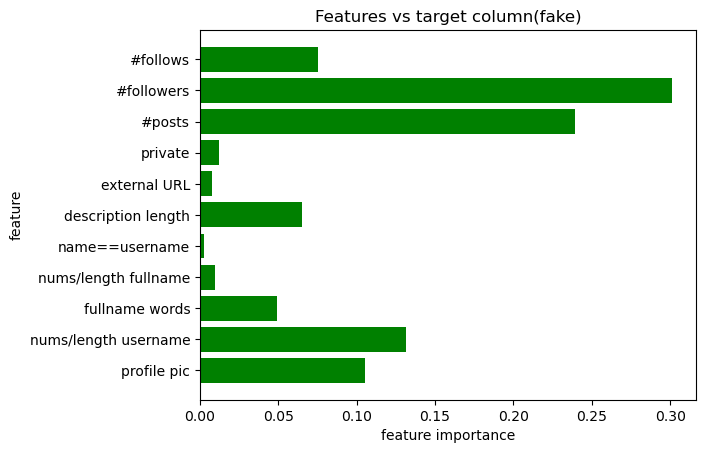

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
importances = rf.feature_importances_
feature_importance_series = pd.Series(importances, index=x.columns)
print("Feature Importances:\n", feature_importance_series.sort_values(ascending=False))

plt.barh(x.columns,clf.feature_importances_,color='green')
plt.title('Features vs target column(fake)')
plt.xlabel('feature importance')
plt.ylabel('feature')
# It shows that '#followers' column is most proportional to the detection of fake 

In [42]:
# Final dataset would look as :
df.sample(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
276,1,0.0,1,0.0,0,30,0,1,103,1775,7500,0
20,1,0.0,2,0.0,0,40,0,0,228,3516,999,0
350,0,0.2,1,0.2,1,61,0,1,5,7,47,1
554,1,0.6,1,0.5,0,0,0,0,12,65,162,1
241,1,0.0,2,0.0,0,0,0,0,0,96,50,0
